# EDA on Diabetes Readmission Dataset

## Introduction

This exploratory data analysis (EDA) project focuses on the Diabetes 130-US hospitals for years 1999–2008 dataset, which includes over 100,000 hospital admissions for diabetic patients. Diabetes Mellitus (DM) is a chronic illness that significantly impacts patient health outcomes and hospital resource use. Among diabetic patients, 30-day hospital readmission rates are notably high — between 14.4% and 22.7% — making it a critical quality-of-care metric.

The primary objective of this EDA is to:

-- Understand the distribution and relationships between patient demographics, hospital stay details, diagnosis codes, and medication usage.

-- Identify patterns and factors that correlate with early (within 30 days) readmission.

-- Explore which medications appear to be most commonly associated with reduced readmission rates.

Through detailed visualizations and statistical summaries, this notebook aims to uncover insights that can help improve patient care, reduce hospital readmissions, and inform further analysis or predictive modeling.

In [1]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Overview

In [2]:
# importing the dataset

df = pd.read_csv("diabetic_data.csv") 
pd.set_option('display.max_columns', None)

In [3]:
# dataset head

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# dataset tail

df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [5]:
# dataset shape

df.shape

(101766, 50)

In [6]:
# stat of random sample of 100 from the dataset

df.sample(100).describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,1.747061e+08,5.617127e+07,2.070000,4.410000,5.510000,4.380000,44.580000,1.270000,16.48000,0.380000,0.060000,0.540000,7.230000
std,9.917123e+07,3.950871e+07,1.603374,6.490234,3.677656,2.859611,18.129824,1.763004,6.97974,1.212561,0.277798,1.122947,1.802664
min,3.185130e+06,2.542590e+05,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.00000,0.000000,0.000000,0.000000,2.000000
25%,9.647323e+07,2.463431e+07,1.000000,1.000000,1.000000,2.000000,33.750000,0.000000,11.00000,0.000000,0.000000,0.000000,6.000000
50%,1.604777e+08,4.485422e+07,1.000000,1.000000,7.000000,4.000000,46.000000,0.000000,16.00000,0.000000,0.000000,0.000000,8.000000
75%,2.376471e+08,8.517068e+07,3.000000,6.000000,7.000000,5.250000,58.000000,2.000000,21.00000,0.000000,0.000000,1.000000,9.000000
max,4.373988e+08,1.826304e+08,8.000000,28.000000,20.000000,14.000000,98.000000,6.000000,37.00000,9.000000,2.000000,8.000000,9.000000


# Data Cleaning

In [7]:
# finding the sum of the null values from the dataset
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
# all 50 columns from the dataset
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [9]:
# creating the new dataset
df2 = df[['race', 'gender', 'age', 'time_in_hospital', 'diabetesMed', 'readmitted']]

In [10]:
df2.shape

(101766, 6)

# Exploratory Data Analysis

In [11]:
df2.head()

,race,gender,age,time_in_hospital,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,No,NO
1,Caucasian,Female,[10-20),3,Yes,>30
2,AfricanAmerican,Female,[20-30),2,Yes,NO
3,Caucasian,Male,[30-40),2,Yes,NO
4,Caucasian,Male,[40-50),1,Yes,NO


In [12]:
# number of patient either taking or not taking diabetes meds 
df2['diabetesMed'].value_counts()

diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64

In [13]:
# finding the number of patients in each readmission categories
df2['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [14]:
# total number of patient
total_patient = df.shape[0]

# patient that got readmitted within 30 days 
readmitted_30 = df2[df2['readmitted'] == '<30'].shape[0]

# calculate the readmission rate
readmission_rate_30 = readmitted_30 / total_patient * 100 

print(f'Readmission rate for less than 30 days: {readmission_rate_30:.2f}')






Readmission rate for less than 30 days: 11.16


In [15]:
# finfing the readmission rates for when the patient comes in after 30 days 
readm_more_30 = df2[df2['readmitted']== '>30'].shape[0]

read_rate_more_30 = readm_more_30 / total_patient * 100

print(f'Readmission rate after than 30 days: {read_rate_more_30:.2f}')


Readmission rate after than 30 days: 34.93


In [16]:
# finding the connection between the diabetic meds pres and the reamission witin 30 days 

readmit_vs_meds = pd.crosstab(df2['diabetesMed'], df2['readmitted'], normalize='index')
print(readmit_vs_meds)

readmitted        <30       >30        NO
diabetesMed                              
No           0.095971  0.308807  0.595223
Yes          0.116267  0.361370  0.522364


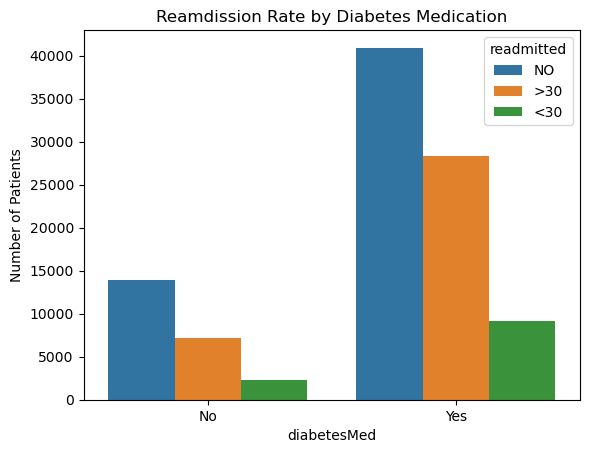

In [17]:
sns.countplot(x='diabetesMed', hue='readmitted', data = df2)
plt.title('Reamdission Rate by Diabetes Medication')
plt.ylabel('Number of Patients')
plt.show()


This graph does show unusual pattern where the patient taking diabetes meds are more likely to come back within 30 days. One thing that can explain such trend is the the patient that are taking medication might have a more severe case of diabetes. The patient that do not have a severe case of diabetes might not need to take medication and they also might not get readmitted for said reasons. 

In [18]:
# finding the connection between the diabetic meds pres and the reamission witin 30 days 

readmit_vs_meds = pd.crosstab(df2['age'], df2['diabetesMed'], normalize='index')
print(readmit_vs_meds)

diabetesMed        No       Yes
age                            
[0-10)       0.173913  0.826087
[10-20)      0.131693  0.868307
[20-30)      0.206397  0.793603
[30-40)      0.245298  0.754702
[40-50)      0.235416  0.764584
[50-60)      0.223401  0.776599
[60-70)      0.216697  0.783303
[70-80)      0.225449  0.774551
[80-90)      0.249055  0.750945
[90-100)     0.303974  0.696026


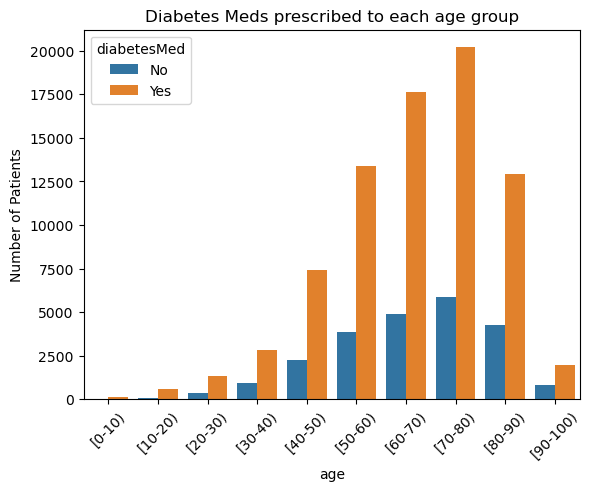

In [19]:
sns.countplot(x='age', hue='diabetesMed', data = df2)
plt.title('Diabetes Meds prescribed to each age group')
plt.ylabel('Number of Patients')
plt.xticks(rotation = 45)
plt.show()


This shows that the older you get the patiet get older they are prescirbed the medication for their diabetes. 
But additionally we need to find out the age of patient that are coming back in <30 days  

In [20]:


readmit_vs_meds = pd.crosstab(df2['age'], df2['readmitted'], normalize='index')
print(readmit_vs_meds)

readmitted       <30       >30        NO
age                                     
[0-10)      0.018634  0.161491  0.819876
[10-20)     0.057887  0.324168  0.617945
[20-30)     0.142426  0.307785  0.549789
[30-40)     0.112318  0.314437  0.573245
[40-50)     0.106040  0.338462  0.555498
[50-60)     0.096662  0.342895  0.560443
[60-70)     0.111284  0.351243  0.537473
[70-80)     0.117731  0.363472  0.518797
[80-90)     0.120835  0.361865  0.517300
[90-100)    0.110992  0.289295  0.599714


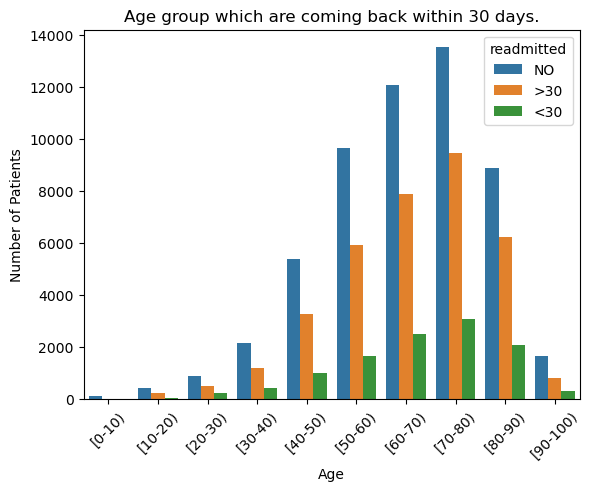

In [21]:
sns.countplot(x='age', hue='readmitted', data = df2)
plt.title('Age group which are coming back within 30 days.')
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.xticks(rotation = 45)
plt.show()



Now we get more clear picture that the patient that are presvribe and also the patient coming back are (70 to 80) year old group. This shows how the patient from this age group are suffering from severe case of diabetes. This supports our claim above where we find patient coming back are those taking the medication. 


we are seeing the same trend that patient from the age group 70 to 80 are the ones that comeback to hospitals within 30 days because of their diabetes.  

In [22]:
df2.head(10)

,race,gender,age,time_in_hospital,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,No,NO
1,Caucasian,Female,[10-20),3,Yes,>30
2,AfricanAmerican,Female,[20-30),2,Yes,NO
3,Caucasian,Male,[30-40),2,Yes,NO
4,Caucasian,Male,[40-50),1,Yes,NO
5,Caucasian,Male,[50-60),3,Yes,>30
6,Caucasian,Male,[60-70),4,Yes,NO
7,Caucasian,Male,[70-80),5,Yes,>30
8,Caucasian,Female,[80-90),13,Yes,NO
9,Caucasian,Female,[90-100),12,Yes,NO


In [23]:
# finding the connection between the diabetic meds pres and the reamission witin 30 days 

# readmit_vs_meds = pd.crosstab(df2['age'], df2['diabetesMed'], normalize='index')
# print(readmit_vs_meds)


race_vs_meds = pd.crosstab(df2['race'], df2['time_in_hospital'], normalize='index')
print(race_vs_meds)

time_in_hospital        1         2         3         4         5         6   \
race                                                                           
?                 0.145183  0.168500  0.182138  0.140343  0.089309  0.076111   
AfricanAmerican   0.131338  0.172670  0.165955  0.133420  0.099948  0.074857   
Asian             0.195008  0.198128  0.156006  0.124805  0.081123  0.068643   
Caucasian         0.139976  0.167453  0.176323  0.138018  0.098070  0.074390   
Hispanic          0.155621  0.200295  0.178694  0.129111  0.098675  0.069710   
Other             0.173307  0.163347  0.180611  0.130146  0.084329  0.053785   

time_in_hospital        7         8         9         10        11        12  \
race                                                                           
?                 0.061153  0.041355  0.027277  0.022437  0.017158  0.009239   
AfricanAmerican   0.060073  0.045705  0.030973  0.024154  0.021291  0.016137   
Asian             0.045242  0.043682  0

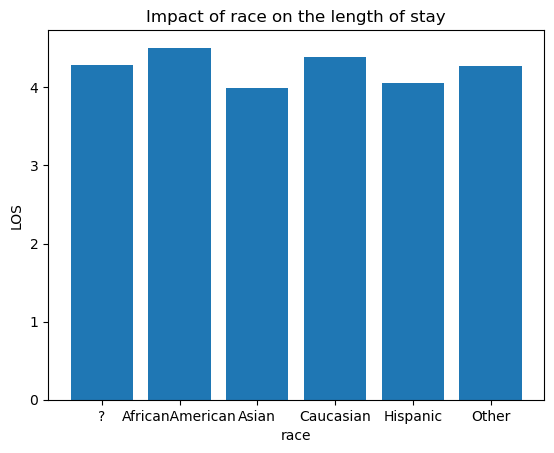

In [24]:
race_los = df2.groupby('race')['time_in_hospital'].mean().reset_index()

plt.bar(race_los['race'], race_los['time_in_hospital'])
plt.title('Impact of race on the length of stay')
plt.xlabel('race')
plt.ylabel('LOS')
plt.show()

# High-Risk Group Analysis

1. What age groups are most frequently readmitted within 30 days?

In [25]:
# number of patient within the age group that got readmitted witin 30 days. 
age_freq_admitted = df2[df2['readmitted'] == '>30']['age'].value_counts() #.idxmax() to get the index max
print(age_freq_admitted)

age
[70-80)     9475
[60-70)     7897
[80-90)     6223
[50-60)     5917
[40-50)     3278
[30-40)     1187
[90-100)     808
[20-30)      510
[10-20)      224
[0-10)        26
Name: count, dtype: int64


2. Is there a difference in readmission rates between races? Explore how race is distributed across the three readmitted categories: <30, >30, and NO.

In [26]:
AA_race = df[df['race'] == 'AfricanAmerican']['readmitted'].value_counts()
print(AA_race)

readmitted
NO     10421
>30     6634
<30     2155
Name: count, dtype: int64


In [27]:
race_read = df.groupby('race')['readmitted'].value_counts()
print(race_read)

race             readmitted
?                NO             1547
                 >30             538
                 <30             188
AfricanAmerican  NO            10421
                 >30            6634
                 <30            2155
Asian            NO              415
                 >30             161
                 <30              65
Caucasian        NO            40383
                 >30           27124
                 <30            8592
Hispanic         NO             1183
                 >30             642
                 <30             212
Other            NO              915
                 >30             446
                 <30             145
Name: count, dtype: int64


3. Does taking diabetes medication influence readmission rates? Investigate if diabetesMed = Yes correlates with lower <30 day readmission or not.


In [28]:
# affect of meds on readmission rates.
readmission_vs_meds = df2[df2['readmitted'] == '<30']['diabetesMed'].value_counts()
print(readmission_vs_meds)

diabetesMed
Yes    9111
No     2246
Name: count, dtype: int64


4. How does the length of hospital stay (time_in_hospital) vary across readmission groups? Check if patients readmitted within 30 days had shorter or longer stays during their initial visit.


In [29]:
# checking mean los with patients readmission. 
los_readmitted = df2.groupby('readmitted')['time_in_hospital'].mean()
print(f"{los_readmitted}")

readmitted
<30    4.768249
>30    4.495541
NO     4.254429
Name: time_in_hospital, dtype: float64


5. Are males or females more likely to be readmitted? Explore gender and compare rates of <30 day readmission across sexes.


In [30]:
df2.head()

,race,gender,age,time_in_hospital,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,No,NO
1,Caucasian,Female,[10-20),3,Yes,>30
2,AfricanAmerican,Female,[20-30),2,Yes,NO
3,Caucasian,Male,[30-40),2,Yes,NO
4,Caucasian,Male,[40-50),1,Yes,NO


In [31]:
gender_vs_readmission = df2.groupby('readmitted')["gender"].value_counts()['<30']
print(gender_vs_readmission)

gender
Female    6152
Male      5205
Name: count, dtype: int64


6. Which combination of race, gender, and age group is at the highest risk for early readmission? Do a multi-variable group analysis to discover high-risk profiles for predictive modeling later.


In [32]:
# filtering for early readmissions

early_readmissions = df[df['readmitted'] == '<30']


In [33]:
# group by race, gender and age

risk_group  = early_readmissions.groupby(['race', 'gender','age']).size().sort_values(ascending= False)
print(risk_group.head(10))

race       gender  age    
Caucasian  Female  [70-80)    1255
           Male    [70-80)    1200
           Female  [80-90)    1077
           Male    [60-70)    1002
           Female  [60-70)     863
           Male    [80-90)     692
                   [50-60)     587
           Female  [50-60)     585
           Male    [40-50)     315
           Female  [40-50)     305
dtype: int64


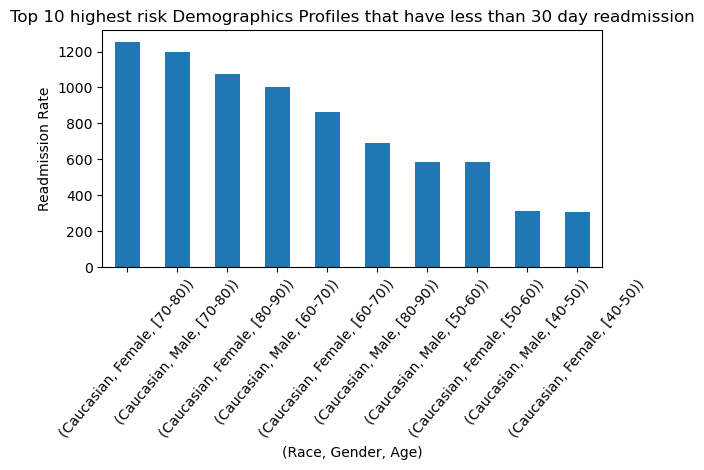

In [34]:
risk_group.head(10).plot(kind = 'bar', title = 'Top 10 highest risk Demographics Profiles that have less than 30 day readmission')
plt.ylabel("Readmission Rate")
plt.xlabel("(Race, Gender, Age)")
plt.xticks(rotation = 50)
plt.tight_layout()
plt.show()

## 🔍 Conclusion & Key Takeaways

- Most early readmissions (<30 days) occurred in patients aged 70–80.
- Patients on diabetes medications were more likely to be readmitted — possibly due to greater disease severity.
- Length of stay was slightly longer for those readmitted early, suggesting possible complications.
- Caucasian, Female, Age 70–80 emerged as a high-risk profile for readmission.

These findings can guide predictive modeling and targeted interventions to reduce readmission rates.
